## Cat VS Dog



In [3]:
#Prepare New Dataset
#We choose parts of cat or dog image from original dataset

import os, shutil

original_dataset_dir = '/Users/cyp/Documents/Dataset/cat_dog/train/'

base_dir = '/Users/cyp/Documents/Dataset/cat_dog_small'
os.mkdir(base_dir)

#Here can be improved
#if os.path.isdir(path):
#   pass
#else:
#   mkdir
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
val_dir = os.path.join(base_dir, 'val')
os.mkdir(val_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [5]:
#Build Network
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ['acc'])

Using TensorFlow backend.


In [6]:
#Data Pre-Prepare
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

val_generator = test_datagen.flow_from_directory(
                  val_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=val_generator,
                              validation_steps=50)

model.save('cats_and_dogs.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 25s 252ms/step - loss: 0.6947 - acc: 0.5360 - val_loss: 0.6867 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 25s 249ms/step - loss: 0.6630 - acc: 0.5970 - val_loss: 0.5975 - val_acc: 0.6480
Epoch 3/30
100/100 [==============================] - 25s 253ms/step - loss: 0.6095 - acc: 0.6620 - val_loss: 0.6306 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 25s 253ms/step - loss: 0.5742 - acc: 0.6940 - val_loss: 0.6316 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 25s 253ms/step - loss: 0.5438 - acc: 0.7250 - val_loss: 0.5134 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 25s 254ms/step - loss: 0.5235 - acc: 0.7295 - val_loss: 0.3509 - val_acc: 0.6610
Epoch 7/30
100/100 [==============================] - 25s 250ms/step - loss: 0.4892 - acc: 0.7630 - val_lo

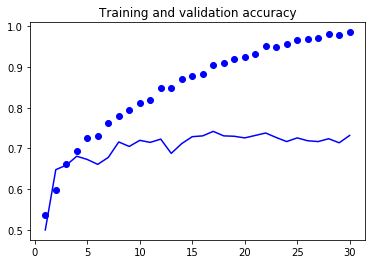

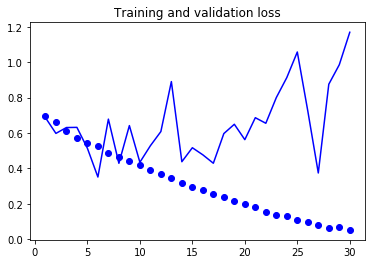

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')

plt.show()

### Data Augmentation

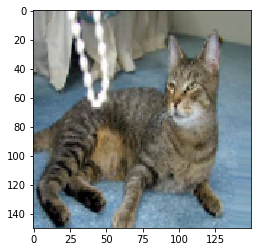

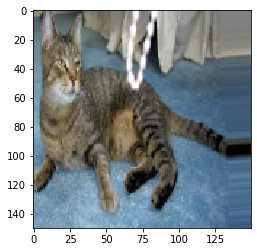

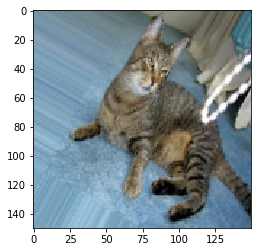

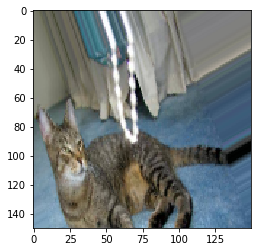

In [13]:
datagen = ImageDataGenerator(
          rotation_range = 40,
          width_shift_range = 0.2, 
          height_shift_range = 0.2,
          shear_range = 0.2, 
          zoom_range = 0.2, 
          horizontal_flip = True,
          fill_mode = 'nearest')

from keras.preprocessing import image 

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()